Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
info = pd.read_excel('EastWestAirlines.xlsx',header=9)
info

,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
0,ID#,NUMBER,NaN,Telcom,Unique ID
1,Balance,NUMBER,8.0,Raw,Number of miles eligible for award travel
2,Qual_miles,NUMBER,8.0,Raw,Number of miles counted as qualifying for Topf...
3,cc1_miles,CHAR,1.0,Raw,Number of miles earned with freq. flyer credit...
4,cc2_miles,CHAR,1.0,Raw,Number of miles earned with Rewards credit car...
5,cc3_miles,CHAR,1.0,Raw,Number of miles earned with Small Business cre...
6,note: miles bins:,NaN,NaN,NaN,"1 = under 5,000"
7,NaN,NaN,NaN,NaN,"2 = 5,000 - 10,000"
8,NaN,NaN,NaN,NaN,"3 = 10,001 - 25,000"
9,NaN,NaN,NaN,NaN,"4 = 25,001 - 50,000"


In [3]:
rawData = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [4]:
rawData.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
rawData.info()                                 ## no null values and no object / category datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
rawData[rawData.duplicated(keep=False)] ## no duplicates

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [7]:
rawData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


###### looking at the data we can drop id which is just unique identification of records, and we also can drop Award? column as it does not make sense to have a dummy variable capturing last award, when all other colums have long term values, such as 1 year.

There are total 4000 datapoints in each columns. except for Balance, 'Qual_miles' and 'Days_since_enroll' all other columns are count of transactions or miles for 12 month period. 

While 'Balance' is also accumulated mile but looks like the miles are accumulated over a period of time more than 12 months, my assumption is that since enrollments. and 

'Qual_miles' are miles qualified / or awarded miles based on their buying / travel patters over a period of 12 month.

'Days_since_enroll' is no of days since enrollment.

So all the columns do contribute toward making clusters. hence we only drop Id and Award? columns

In [8]:
## Drop Id and Award columns
Data = rawData.drop(columns=['ID#','Award?'])
Data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [9]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [10]:
def normalize(D):
    x = (D-D.min())/(D.max()-D.min())
    return x

In [11]:
normData = normalize(Data)
normData.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


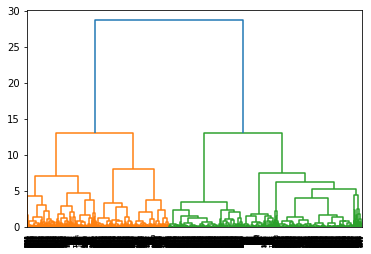

In [12]:
Dendrogram = sch.dendrogram(sch.linkage(normData,method='ward'))

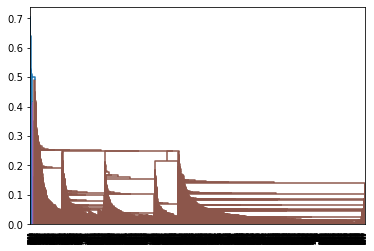

In [13]:
Dendrogram = sch.dendrogram(sch.linkage(normData,method='single'))

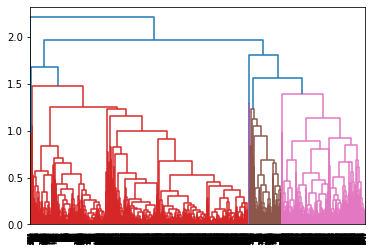

In [14]:
Dendrogram = sch.dendrogram(sch.linkage(normData,method='complete'))

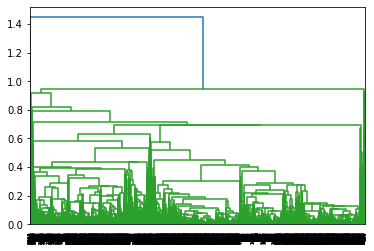

In [15]:
Dendrogram = sch.dendrogram(sch.linkage(normData,method = 'centroid'))

Ward method is giving the best bifurcation of cluster with more or less balanced divisions

In [16]:
# Creating an instance of AgglomarativeClustering and fitting on our normalized data

hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward').fit(normData)

In [17]:
hc.labels_           # display lables. 

array([1, 1, 1, ..., 0, 2, 2], dtype=int64)

In [21]:
hc_id = pd.DataFrame(hc.labels_,columns=['hc_id'])
hc_id.value_counts()

hc_id
1        1416
2         885
0         873
3         825
dtype: int64

In [25]:
# Data['hClust_ID'] = H_clust.labels_
master_Data = Data.copy(deep=True)
master_Data = pd.concat([hc_id,master_Data],axis=1)

In [26]:
clusters = pd.DataFrame(master_Data.groupby('hc_id').mean())
clusters

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
hc_id,,,,,,,,,,
0,72996.447881,68.589920,2.681558,1.000000,1.000000,16943.699885,15.759450,239.436426,0.668958,4262.847652
1,62223.716808,234.064972,1.019774,1.040254,1.002119,4402.119350,6.608757,527.386299,1.600282,5033.024718
2,32935.376271,86.981921,1.000000,1.000000,1.000000,3431.109605,6.976271,373.468927,1.089266,1741.317514
3,137392.992727,130.933333,4.322424,1.001212,1.055758,53939.947879,20.734545,670.831515,2.035152,4946.453333


In [27]:
import seaborn as sns

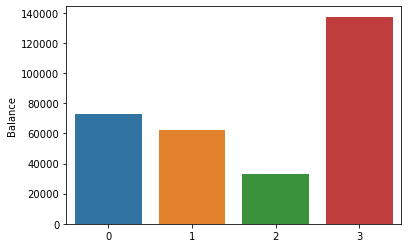

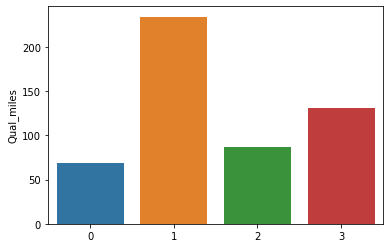

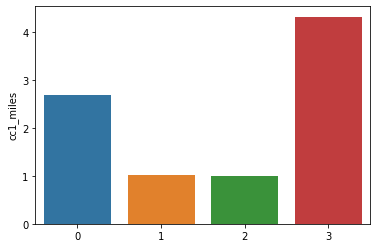

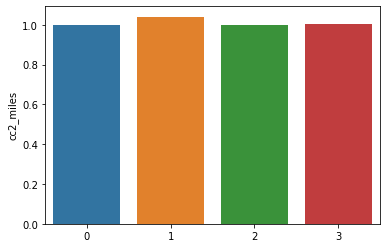

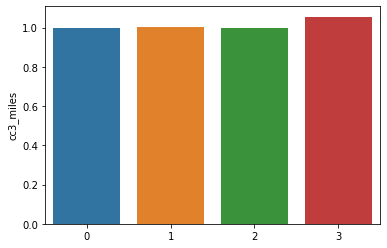

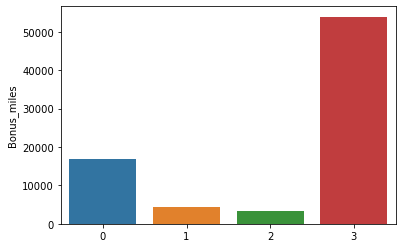

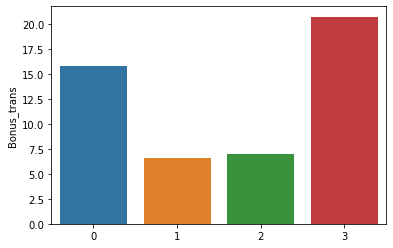

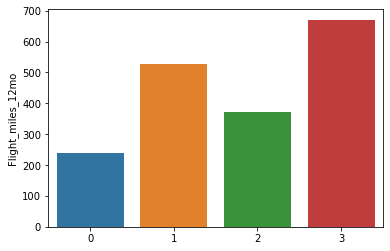

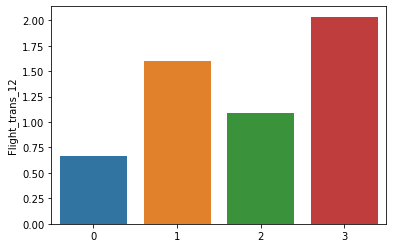

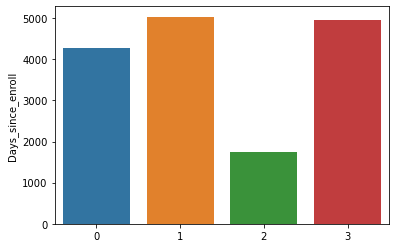

In [28]:
for i in clusters:
    sns.barplot(x = [0,1,2,3] , y = clusters[i])    ## Visual representation of each column for each cluster
    plt.show()

As expected Days_since_enroll is not contributing to our analysis as this influences our clustring on the age of the customer rather than frequency of flying. example: a newly joined customer who is a frequent flyer is still grouped with the beginer cluster rather than grouping in a frequent cluster. Same is the story with Balance and Qual Mile.

My undestanding is that based on the performance of the recent past we should award the customer more miles. rather than age and accumulated balance of the customer. let us try without those columns.

In [43]:
Fly_data = Data.drop(['Balance','Qual_miles','Days_since_enroll'],axis=1)
Fly_data

,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,hClust_ID
0,1,1,1,174,1,0,0,1
1,1,1,1,215,2,0,0,1
2,1,1,1,4123,4,0,0,1
3,1,1,1,500,1,0,0,1
4,4,1,1,43300,26,2077,4,3
...,...,...,...,...,...,...,...,...
3994,1,1,1,8525,4,200,1,2
3995,1,1,1,981,5,0,0,2
3996,3,1,1,25447,8,0,0,0
3997,1,1,1,500,1,500,1,2


In [44]:
# let us build dendrogram with ward method to check.

In [45]:
NFD = normalize(Fly_data)

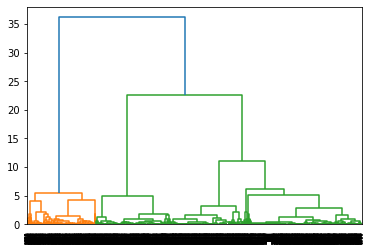

In [47]:
Dendrogram = sch.dendrogram(sch.linkage(NFD,method='ward'))

In [48]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [50]:
hci = hc.fit_predict(NFD)
hClust = pd.DataFrame(hci)
hClust.value_counts()

0    1405
3     885
2     884
1     825
dtype: int64

In [52]:
Data['hClust'] = hc.labels_
Data.head(30)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,hClust_ID,hClust
0,28143,0,1,1,1,174,1,0,0,7000,1,0
1,19244,0,1,1,1,215,2,0,0,6968,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,1,0
3,14776,0,1,1,1,500,1,0,0,6952,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,3,1
5,16420,0,1,1,1,0,0,0,0,6942,1,0
6,84914,0,3,1,1,27482,25,0,0,6994,0,2
7,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,104860,0,3,1,1,28426,28,1150,3,6931,0,2


In [78]:
ClustG = pd.DataFrame(Data.groupby('hClust').mean())
ClustG

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,hClust_ID
hClust,,,,,,,,,,,
0,61603.054804,182.631317,1.002847,1.040569,1.002135,4233.360854,6.518149,527.735943,1.600712,5029.817794,1.000000
1,137392.992727,130.933333,4.322424,1.001212,1.055758,53939.947879,20.734545,670.831515,2.035152,4946.453333,3.000000
2,73848.857466,152.395928,2.687783,1.000000,1.000000,17055.858597,15.789593,242.463801,0.679864,4277.528281,0.012443
3,32935.376271,86.981921,1.000000,1.000000,1.000000,3431.109605,6.976271,373.468927,1.089266,1741.317514,2.000000


In [80]:
ClustG.drop('hClust_ID',axis=1,inplace=True)

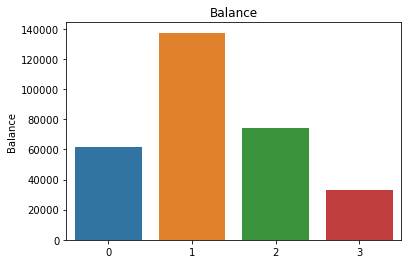

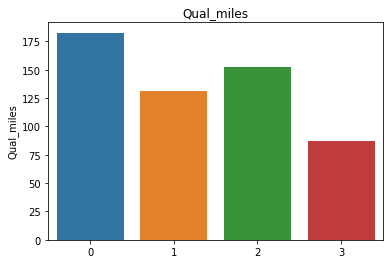

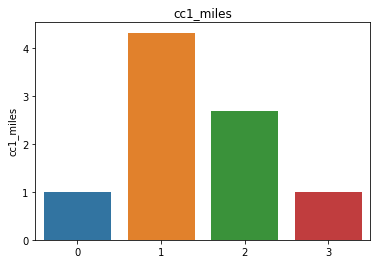

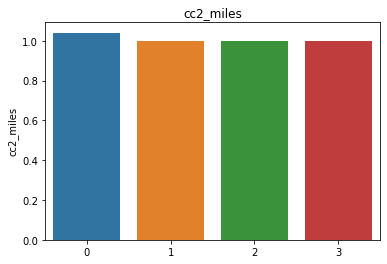

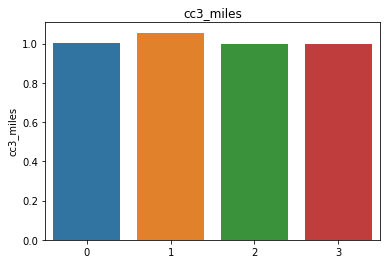

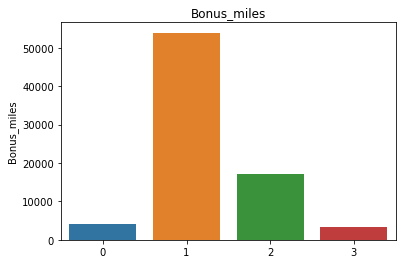

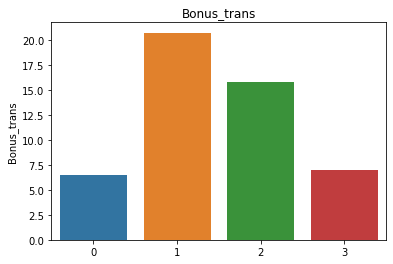

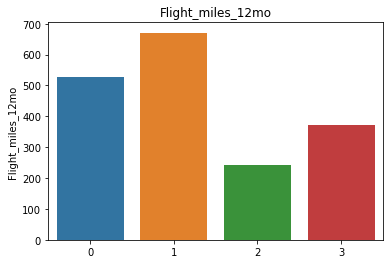

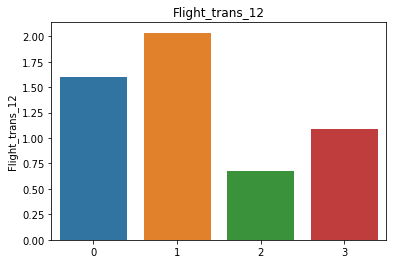

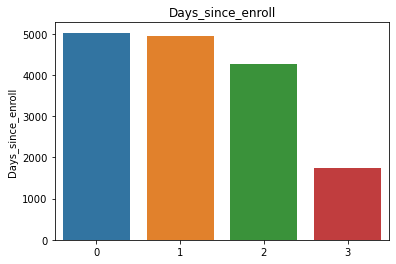

In [83]:
for i in ClustG:
    sns.barplot(x=[0,1,2,3],y = ClustG[i])
    plt.title(i)
    plt.show()

In [85]:
ClustG.sort_values(by='cc1_miles',inplace=True)

In [90]:
# labeling the cluster as silver, gold, Dimond and Platinum clusters.
Final = ClustG.reset_index()
Final

,hClust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,3,32935.376271,86.981921,1.000000,1.000000,1.000000,3431.109605,6.976271,373.468927,1.089266,1741.317514
1,0,61603.054804,182.631317,1.002847,1.040569,1.002135,4233.360854,6.518149,527.735943,1.600712,5029.817794
2,2,73848.857466,152.395928,2.687783,1.000000,1.000000,17055.858597,15.789593,242.463801,0.679864,4277.528281
3,1,137392.992727,130.933333,4.322424,1.001212,1.055758,53939.947879,20.734545,670.831515,2.035152,4946.453333


In [92]:
Final['ClstLable'] = ['Silver','Gold','Dimond','Platinum']
Final

,hClust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,ClstLable
0,3,32935.376271,86.981921,1.000000,1.000000,1.000000,3431.109605,6.976271,373.468927,1.089266,1741.317514,Silver
1,0,61603.054804,182.631317,1.002847,1.040569,1.002135,4233.360854,6.518149,527.735943,1.600712,5029.817794,Gold
2,2,73848.857466,152.395928,2.687783,1.000000,1.000000,17055.858597,15.789593,242.463801,0.679864,4277.528281,Dimond
3,1,137392.992727,130.933333,4.322424,1.001212,1.055758,53939.947879,20.734545,670.831515,2.035152,4946.453333,Platinum


In [94]:
z = pd.DataFrame(['Silver','Gold','Dimond','Platinum'],columns=["Cluster_Label"])
z

,Cluster_Label
0,Silver
1,Gold
2,Dimond
3,Platinum


In [96]:
Final = pd.concat([z,Final],axis=1)

In [97]:
Final

,Cluster_Label,hClust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,ClstLable
0,Silver,3,32935.376271,86.981921,1.000000,1.000000,1.000000,3431.109605,6.976271,373.468927,1.089266,1741.317514,Silver
1,Gold,0,61603.054804,182.631317,1.002847,1.040569,1.002135,4233.360854,6.518149,527.735943,1.600712,5029.817794,Gold
2,Dimond,2,73848.857466,152.395928,2.687783,1.000000,1.000000,17055.858597,15.789593,242.463801,0.679864,4277.528281,Dimond
3,Platinum,1,137392.992727,130.933333,4.322424,1.001212,1.055758,53939.947879,20.734545,670.831515,2.035152,4946.453333,Platinum


In [100]:
Final.drop(['hClust','ClstLable'],axis=1,inplace=True)
Final

,Cluster_Label,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,Silver,32935.376271,86.981921,1.000000,1.000000,1.000000,3431.109605,6.976271,373.468927,1.089266,1741.317514
1,Gold,61603.054804,182.631317,1.002847,1.040569,1.002135,4233.360854,6.518149,527.735943,1.600712,5029.817794
2,Dimond,73848.857466,152.395928,2.687783,1.000000,1.000000,17055.858597,15.789593,242.463801,0.679864,4277.528281
3,Platinum,137392.992727,130.933333,4.322424,1.001212,1.055758,53939.947879,20.734545,670.831515,2.035152,4946.453333


Hirarchial Clustering more or less show same cluster with or without balances and Days_since_enroll columns.